# Decide The Car

In this Project, we are going to predict the Price of Used Cars using various features like Present_Price, Selling_Price, Kms_Driven, Fuel_Type, Year etc. The data used in this project was downloaded from Kaggle.

#### To be able to predict used cars market value can help both buyers and sellers.

There are lots of individuals who are interested in the used car market at some points in their life because they wanted to sell their car or buy a used car. In this process, it’s a big corner to pay too much or sell less then it’s market value.


# Importing the modules needed

In [1]:
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle

### Ignore the warnings

In [2]:
warnings.filterwarnings("ignore")

## Getting the data

In [3]:
df=pd.read_csv('car data.csv')

## Loading the raw data

### Analysis of the record by displaying 10 records

In [4]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Preprocessing

In [5]:
df.describe(include='all')
#The describe() function computes a summary of statistics pertaining to the DataFrame columns.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


## Checking the data

In [6]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


In [7]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# checking missing value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#finding the unique entries in each column 
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Car_Name'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Act

## Arranging the dataset

In [10]:
#giving the final dataset the columns required to analyse the price
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [11]:
#preview of the changed/updated dataset
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
#creating a new column as current year
final_dataset['Current Year']=2021

In [13]:
#creating new column named number of years the car was old
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [14]:
# to drop the unwanted column of year when it was bought
final_dataset.drop(['Year'],axis=1,inplace=True)

In [15]:
# to drop the column of current year
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
# Dealing With Categorical Variables, creating dummie
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# Data Exploration and Visualisation

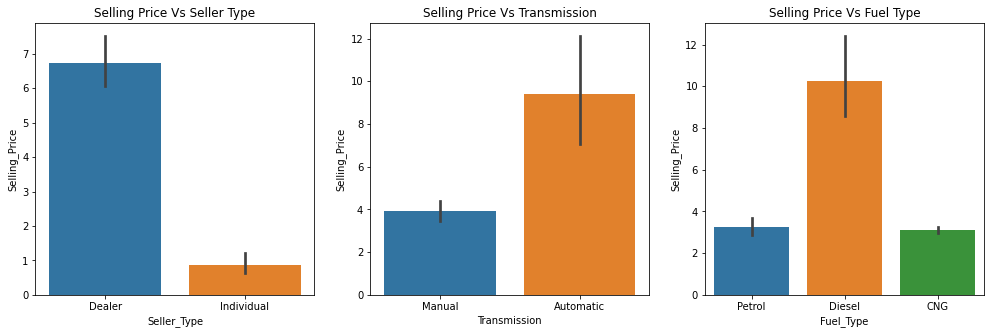

In [19]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['Seller_Type'], df['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(df['Transmission'],df['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(df['Fuel_Type'],df['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

###### Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals. 

###### It can be observed that Selling Price would be higher for cars that are Automatic.

###### Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG

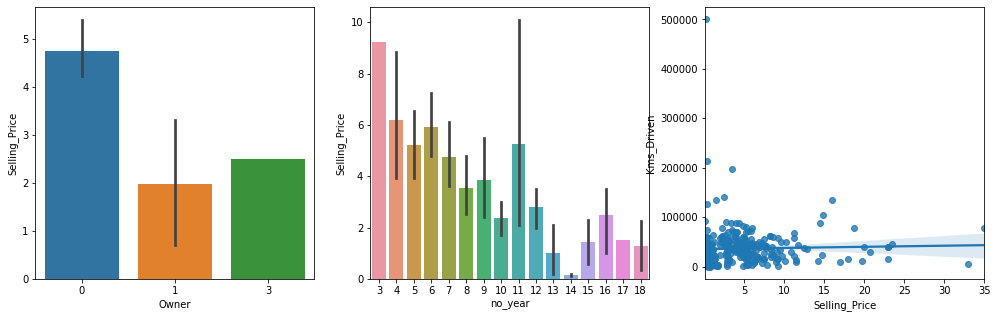

In [20]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['Owner'],df['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(final_dataset['no_year'],final_dataset['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(df['Selling_Price'],df['Kms_Driven'])
plt.show()

###### Selling Price is high with less Owners used Cars.
###### Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old.
###### Lesser the Kms driven higher the Selling Price.

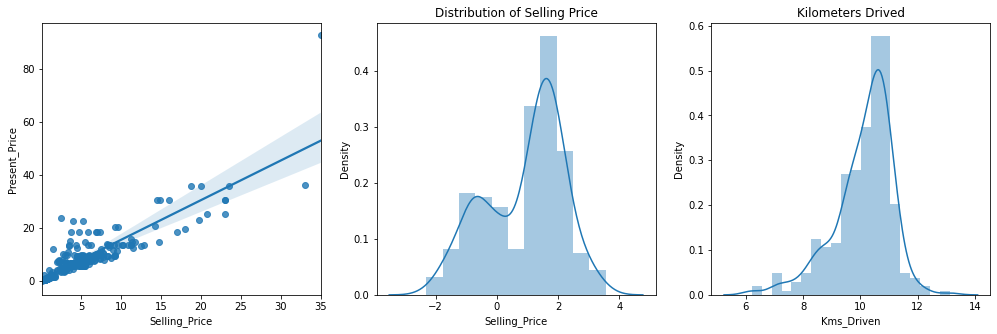

In [21]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(df['Selling_Price'],df['Present_Price'])

plt.subplot(1,3,2)
sns.distplot(np.log(df['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

###### Selling Price tends to increase with increase in the Present Price of cars. 

In [22]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


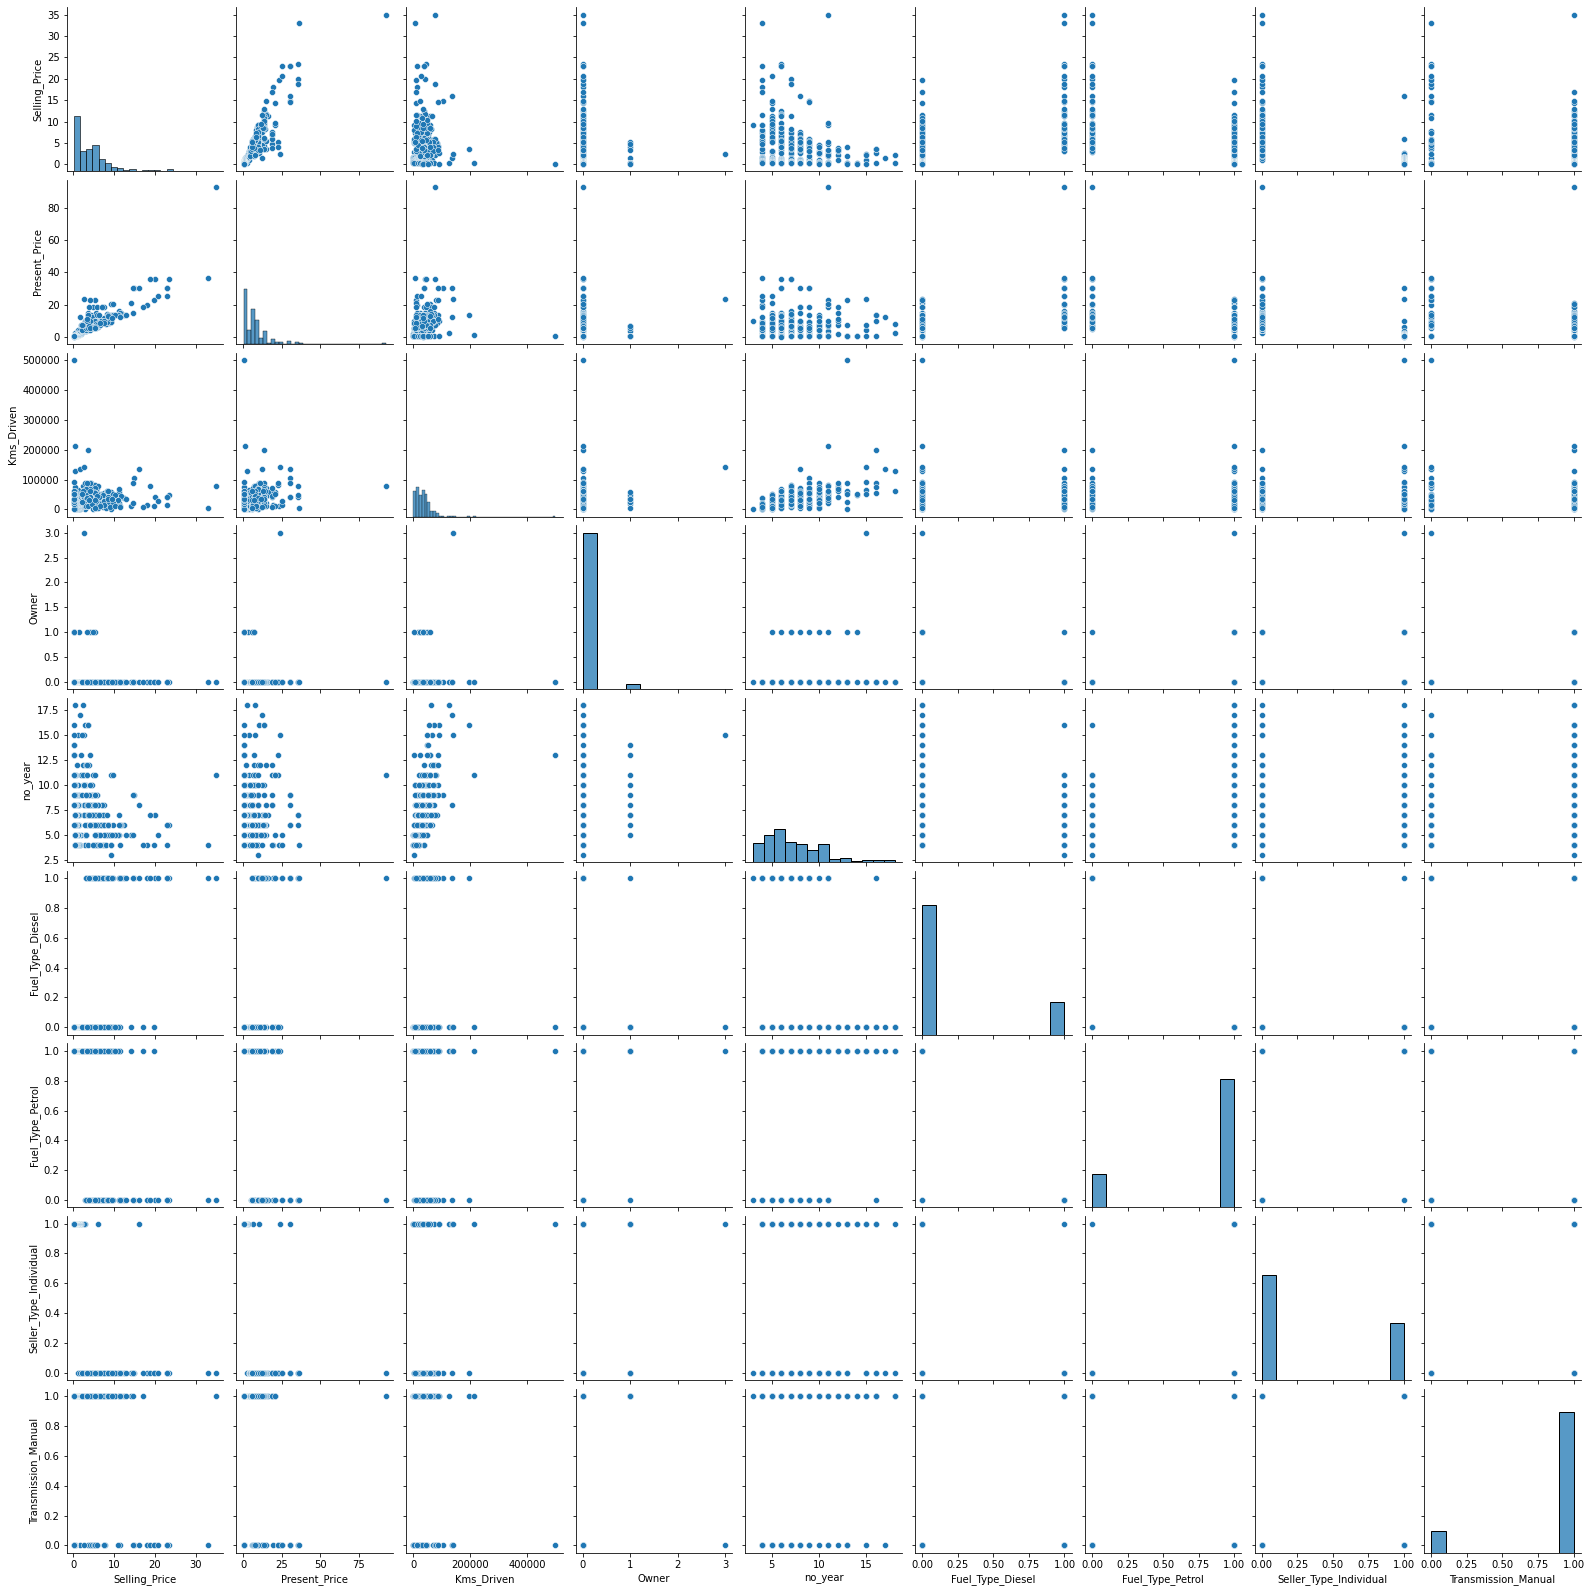

In [23]:
sns.pairplot(final_dataset)

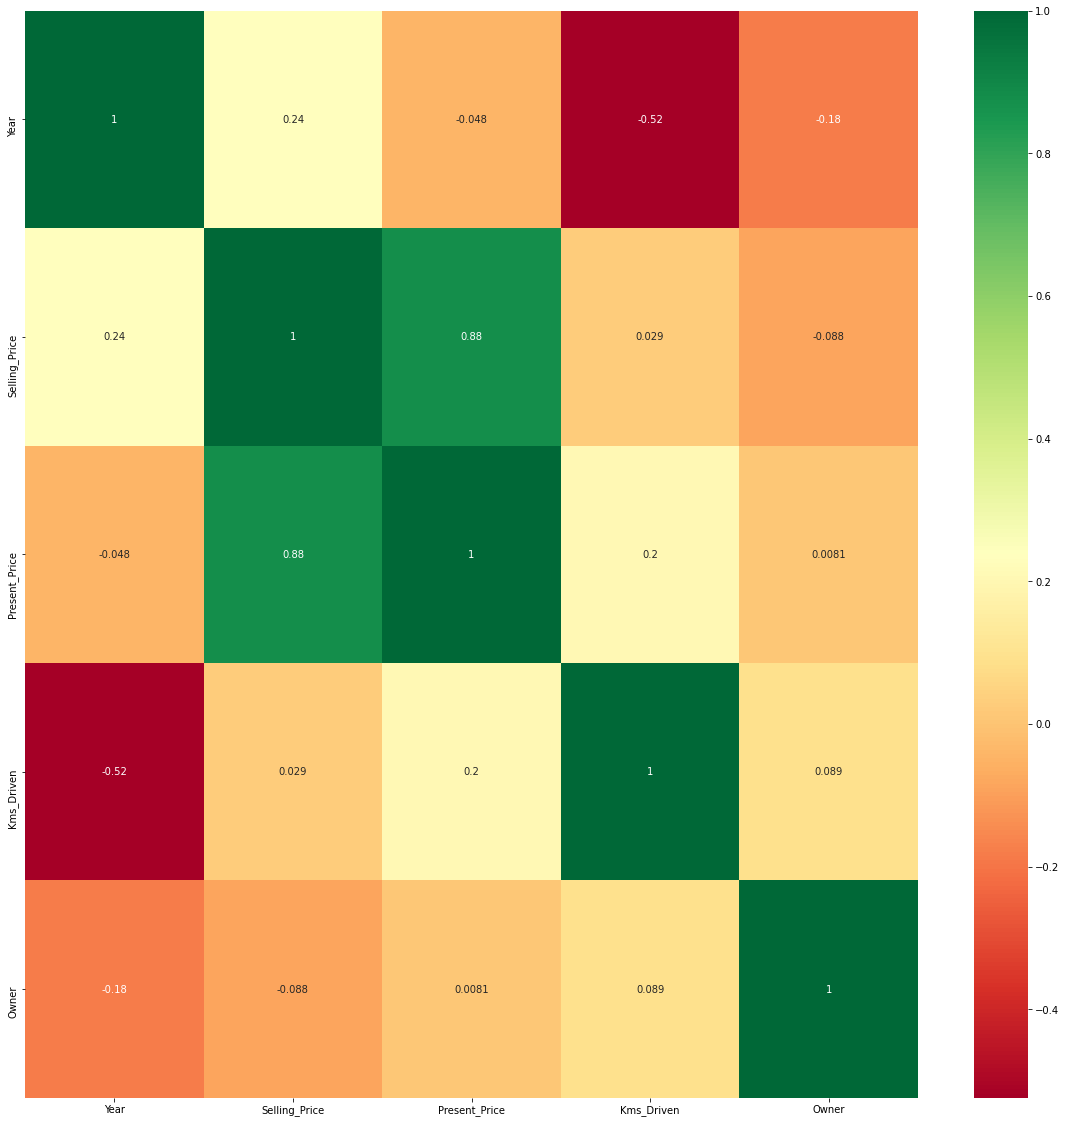

In [24]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Feature Selection

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

<AxesSubplot:>

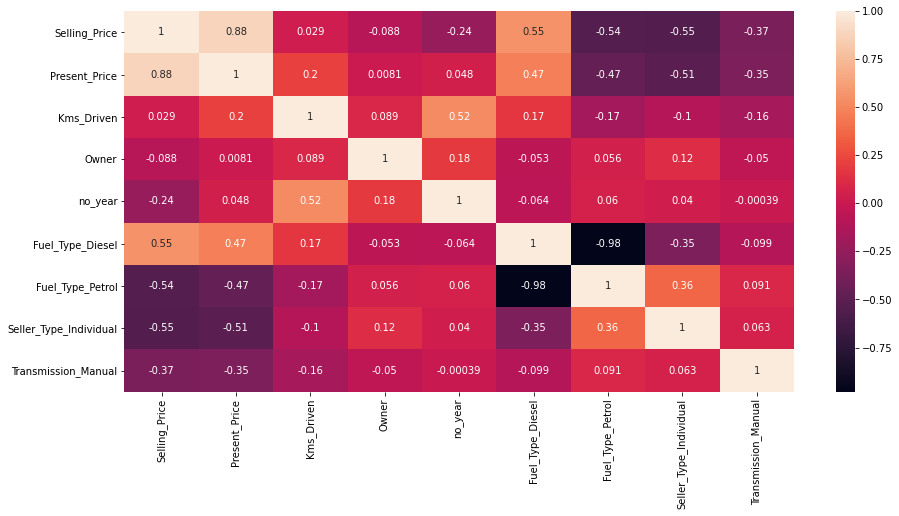

In [25]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(final_dataset.corr(), annot=True)

# Model Development

### Declaring dependent and independent variables

In [26]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [27]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [28]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Feature Importance 

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

In [29]:
# Important feature using ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[0.40235446 0.04108663 0.00139163 0.07405889 0.21259574 0.01399741
 0.12472694 0.12978831]


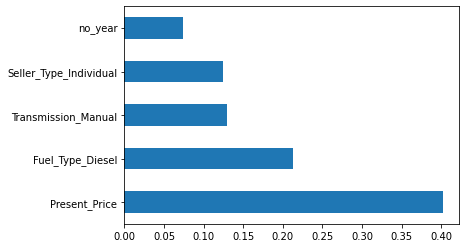

In [31]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [32]:
print(feat_importances.sort_values(ascending=False))

Present_Price             0.402354
Fuel_Type_Diesel          0.212596
Transmission_Manual       0.129788
Seller_Type_Individual    0.124727
no_year                   0.074059
Kms_Driven                0.041087
Fuel_Type_Petrol          0.013997
Owner                     0.001392
dtype: float64


In [33]:
# Selecting useful features.
'''final_dataset = final_dataset[['Selling_Price', 'Present_Price', 'no_year',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual',]]'''
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Feature Scaling

In [34]:
'''# feature scaling on training data
scaler = StandardScaler()
scaler.fit(X[['Present_Price','no_year']])'''

"# feature scaling on training data\nscaler = StandardScaler()\nscaler.fit(X[['Present_Price','no_year']])"

In [35]:
'''input_scaled = scaler.transform(X[['Present_Price','no_year']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','no_year'])
X_scaled =scaled_data.join(X.drop(['Present_Price','no_year'],axis=1))'''

"input_scaled = scaler.transform(X[['Present_Price','no_year']])\nscaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','no_year'])\nX_scaled =scaled_data.join(X.drop(['Present_Price','no_year'],axis=1))"

## Training and Testing Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Linear Regression Model

In [37]:
'''# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(X_train,y_train)

# Model Summary
y_pred_lr = lr.predict(X_test)

r_squared1 = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared1)'''

'# Model Building\nfrom sklearn.linear_model import LinearRegression\nlr = LinearRegression()\n\n# Training Model\nlr.fit(X_train,y_train)\n\n# Model Summary\ny_pred_lr = lr.predict(X_test)\n\nr_squared1 = r2_score(y_test,y_pred_lr)\nrmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))\nprint("R_squared :",r_squared1)'

## Random Forest Regressor Model

In [38]:
'''from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(X_train,y_train)

# Model Summary
y_pred_rf = rf.predict(X_test)

r_squared2 = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared2)'''

'from sklearn.ensemble import RandomForestRegressor\nrf = RandomForestRegressor()\n\n# Training Model\nrf.fit(X_train,y_train)\n\n# Model Summary\ny_pred_rf = rf.predict(X_test)\n\nr_squared2 = r2_score(y_test,y_pred_rf)\nrmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))\nprint("R_squared :",r_squared2)'

## GBT Regressor Model

In [39]:
'''from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

r_squared3 = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared3)'''

'from sklearn.ensemble import GradientBoostingRegressor\ngbt = GradientBoostingRegressor()\n\n# Training Model\ngbt.fit(X_train,y_train)\n\n# Model Summary\ny_pred_gbt = gbt.predict(X_test)\n\nr_squared3 = r2_score(y_test,y_pred_gbt)\nrmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))\nprint("R_squared :",r_squared3)'

In [40]:
'''results = pd.DataFrame({
    'Model': ['Linear Regression Model','Random Forest Regressor Model', 'GBT Regressor Model'],
    'Score': [r_squared1,r_squared2,r_squared3]})
#building a dataframe with corresponding scores of the models 
result_df = results.sort_values(by='Score', ascending=False)
#arranging the data in descending form
result_df = result_df.set_index('Score')
#setting score as index of the dataframe
result_df'''

"results = pd.DataFrame({\n    'Model': ['Linear Regression Model','Random Forest Regressor Model', 'GBT Regressor Model'],\n    'Score': [r_squared1,r_squared2,r_squared3]})\n#building a dataframe with corresponding scores of the models \nresult_df = results.sort_values(by='Score', ascending=False)\n#arranging the data in descending form\nresult_df = result_df.set_index('Score')\n#setting score as index of the dataframe\nresult_df"

##### So as we try diferent Regression Alorithms and found that "Random Forest Regressor Model" is giving better accuracy compare to other.

## Hyperparameter optimization using RandomizedSearchCV

In [44]:
regressor=RandomForestRegressor()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [46]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [47]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [49]:
rf_random.best_score_

-4.0133196952133465

In [50]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

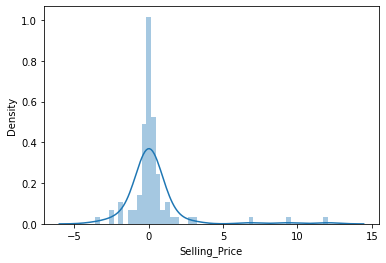

In [51]:
sns.distplot(y_test-predictions)

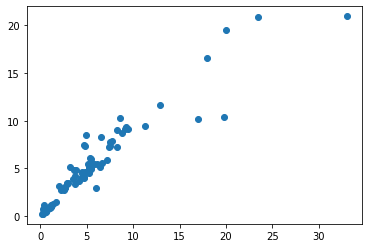

In [52]:
plt.scatter(y_test,predictions)

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8752013736263728
MSE: 3.9160264252649744
RMSE: 1.9788952537375428


In [54]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

## Conclusion 

###### Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
###### Car age is effecting negatively as older the car lesser the Selling Price.
###### Selling Price of cars with Fuel type Diesel is higher.
###### Car of Manual type is of less priced whereas of Automatic type is high.
###### Cars sold by Individual tend to get less Selling Price when sold by Dealers.